# **Energy Consumption & CO2 Emissions Analysis**

## Hypothesis Testing

We'll test several hypotheses about energy consumption and CO2 emissions.



In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import pearsonr, spearmanr, normaltest, ttest_ind, f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## Load Cleaned Dataset

In [2]:
from pathlib import Path
import os

current_dir = Path.cwd()
parent = current_dir.parent

os.chdir(parent)
current_dir = str(Path.cwd())   # update the variable so future code is consistent
print("New current directory:", current_dir)
processed_file_path = current_dir+'\\dataset\\processed\\cleaned_energy_data.csv'
df = pd.read_csv(processed_file_path)

New current directory: d:\Code Institute\Energy-Consumption-CO2-Emissions-Analysis


### Hypothesis 1: GDP and Energy Consumption

**H0 (Null):** There is no significant correlation between GDP and energy consumption

**H1 (Alternative):** There is a significant positive correlation between GDP and energy consumption

**Significance Level:** α = 0.05

In [3]:
# Test correlation between GDP and Energy Consumption
# Remove missing values
data_h1 = df[['GDP', 'Energy_consumption']].dropna()

# Pearson correlation test
corr_coef, p_value = pearsonr(data_h1['GDP'], data_h1['Energy_consumption'])

print(f"\nPearson Correlation Coefficient: {corr_coef:.4f}")
print(f"P-value: {p_value:.4e}")
print(f"Sample size: {len(data_h1):,}")

if p_value < 0.05:
    print(f"\n✓ REJECT NULL HYPOTHESIS (p < 0.05)")
    print(f"  There IS a significant correlation between GDP and energy consumption.")
    if corr_coef > 0:
        print(f"  The correlation is POSITIVE: Higher GDP is associated with higher energy consumption.")
else:
    print(f"\n✗ FAIL TO REJECT NULL HYPOTHESIS (p >= 0.05)")
    print(f"  There is NO significant correlation between GDP and energy consumption.")


Pearson Correlation Coefficient: 0.6918
P-value: 0.0000e+00
Sample size: 33,155

✓ REJECT NULL HYPOTHESIS (p < 0.05)
  There IS a significant correlation between GDP and energy consumption.
  The correlation is POSITIVE: Higher GDP is associated with higher energy consumption.


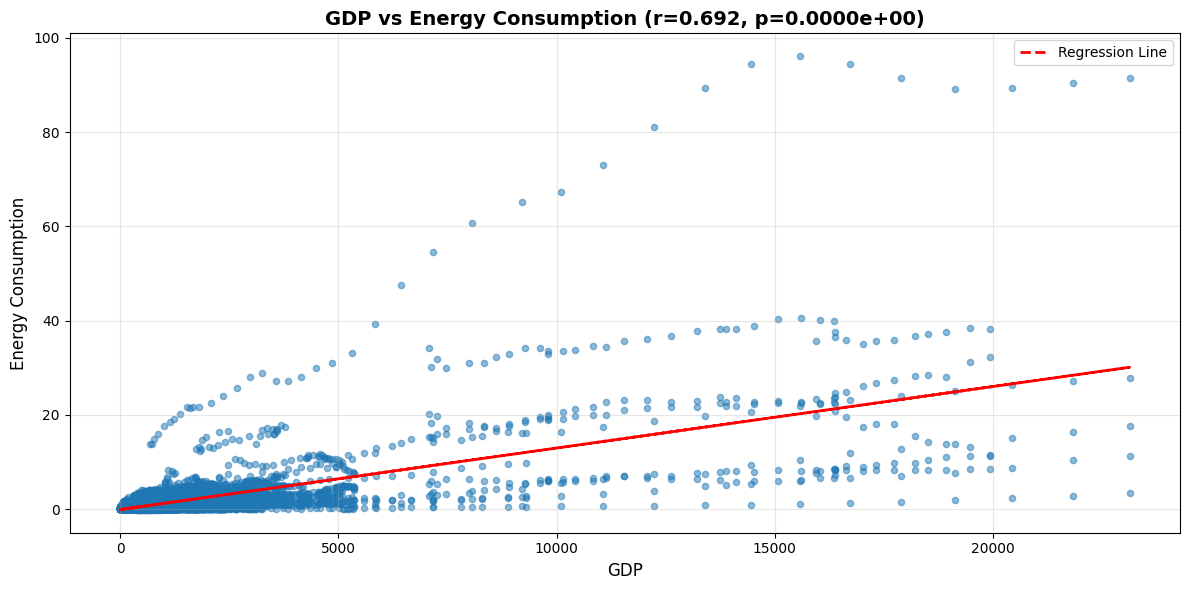

In [4]:
# Visualise relationship
plt.figure(figsize=(12, 6))
plt.scatter(data_h1['GDP'], data_h1['Energy_consumption'], alpha=0.5, s=20)
plt.xlabel('GDP', fontsize=12)
plt.ylabel('Energy Consumption', fontsize=12)
plt.title(f'GDP vs Energy Consumption (r={corr_coef:.3f}, p={p_value:.4e})', 
          fontsize=14, fontweight='bold')

# Add regression line
z = np.polyfit(data_h1['GDP'], data_h1['Energy_consumption'], 1)
p = np.poly1d(z)
plt.plot(data_h1['GDP'], p(data_h1['GDP']), "r--", linewidth=2, label='Regression Line')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

### Hypothesis 2: Renewable vs Fossil Fuel CO2 Emissions

**H0:** There is no significant difference in CO2 emissions between renewable and fossil fuel energy sources

**H1:** Fossil fuel energy sources produce significantly higher CO2 emissions than renewable sources

**Test:** Independent t-test

In [5]:
# Test difference in CO2 emissions between energy source types
# Separate data by energy source type
renewable_co2 = df[df['Energy_source_type'] == 'Renewable']['CO2_emission'].dropna()
fossil_co2 = df[df['Energy_source_type'] == 'Fossil Fuel']['CO2_emission'].dropna()

# Perform t-test
t_stat, p_value = ttest_ind(fossil_co2, renewable_co2)

print(f"\nRenewable Energy CO2 Emissions:")
print(f"  Mean: {renewable_co2.mean():.4f}")
print(f"  Std Dev: {renewable_co2.std():.4f}")
print(f"  Sample size: {len(renewable_co2):,}")

print(f"\nFossil Fuel CO2 Emissions:")
print(f"  Mean: {fossil_co2.mean():.4f}")
print(f"  Std Dev: {fossil_co2.std():.4f}")
print(f"  Sample size: {len(fossil_co2):,}")

print(f"\nT-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value < 0.05:
    print(f"\n✓ REJECT NULL HYPOTHESIS (p < 0.05)")
    print(f"  There IS a significant difference in CO2 emissions between energy sources.")
    print(f"  Fossil fuels produce {fossil_co2.mean() / renewable_co2.mean():.1f}x more CO2 than renewables.")
else:
    print(f"\n✗ FAIL TO REJECT NULL HYPOTHESIS (p >= 0.05)")


Renewable Energy CO2 Emissions:
  Mean: 0.0000
  Std Dev: 0.0000
  Sample size: 9,200

Fossil Fuel CO2 Emissions:
  Mean: 36.8405
  Std Dev: 240.2688
  Sample size: 27,600

T-statistic: 14.7068
P-value: 8.0269e-49

✓ REJECT NULL HYPOTHESIS (p < 0.05)
  There IS a significant difference in CO2 emissions between energy sources.
  Fossil fuels produce infx more CO2 than renewables.


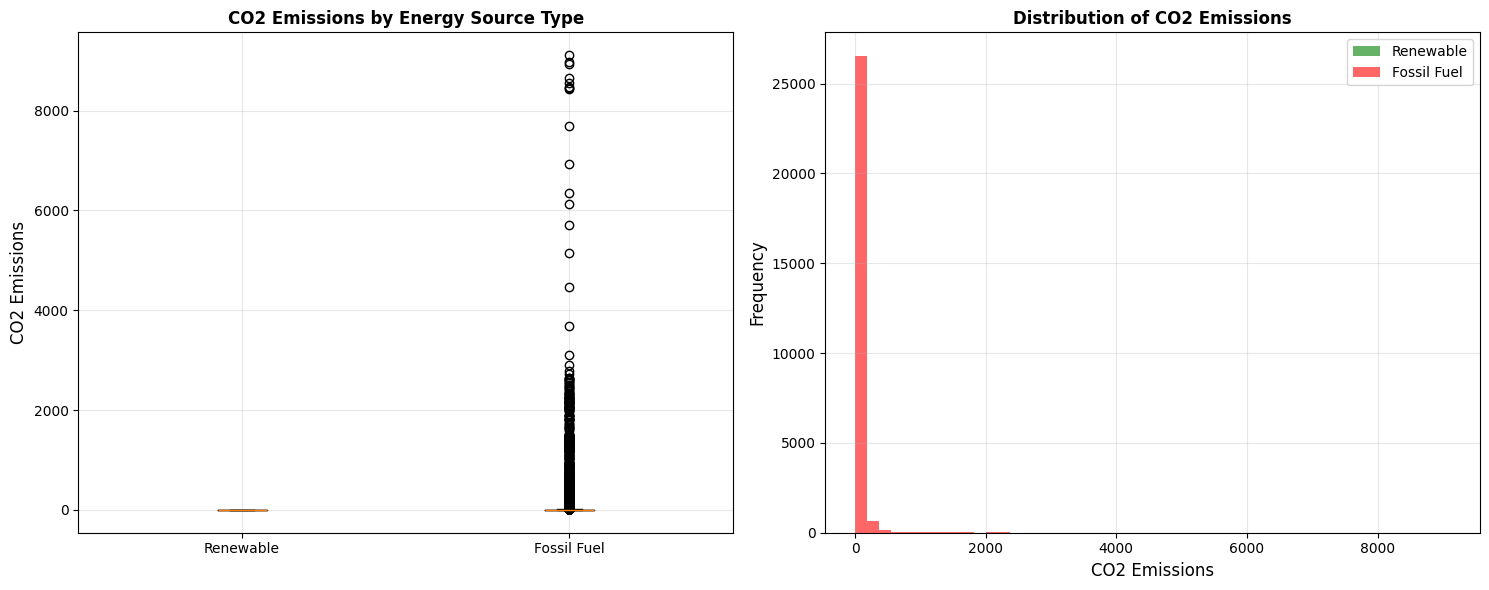

In [6]:
# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box plot
data_to_plot = [renewable_co2, fossil_co2]
axes[0].boxplot(data_to_plot, labels=['Renewable', 'Fossil Fuel'])
axes[0].set_ylabel('CO2 Emissions', fontsize=12)
axes[0].set_title('CO2 Emissions by Energy Source Type', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Histogram comparison
axes[1].hist(renewable_co2, bins=50, alpha=0.6, label='Renewable', color='green')
axes[1].hist(fossil_co2, bins=50, alpha=0.6, label='Fossil Fuel', color='red')
axes[1].set_xlabel('CO2 Emissions', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Distribution of CO2 Emissions', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()